This notebook will explore the Ridge property data as modeled by FVS and the Ecotrust Growth-Yield-Batch system. Also serves as a demonstration of pandas and associated python libraries.

First, we import the necessary libraries

In [1]:
%matplotlib inline
from matplotlib.pylab import plt
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import cm
import seaborn as sns

Create a connection ("engine") to the sqlite database produced by GYB and read the entire table into a pandas DataFrame.

In [2]:
engine = create_engine('sqlite:///data.db')
df = pd.read_sql_table('trees_fvsaggregate', engine)

Ipython is not the cleanest interface with which to browse large datasets. Luckily you can just take the top couple rows

In [3]:
df.head(6)

,accretion,after_ba,after_merch_bdft,after_merch_ft3,after_qmd,after_sdi,after_total_ft3,after_tpa,age,climate,...,merch_carbon_stored,agl,bgl,calc_carbon,dead,total_stand_carbon,econ_removed_merch_bdft,econ_removed_merch_ft3,undiscounted_revenue,harvest_report
0,385,335,72080,13500,18.1,485,14633,186,52,NoClimate,...,0.0,99.8,22.2,122.0,0.0,147.1,0,0,0,None
1,367,334,75563,13961,19.0,476,15272,170,57,NoClimate,...,0.0,103.7,22.6,135.0,8.7,160.3,0,0,0,None
2,98,75,22241,3620,31.3,87,3904,14,62,NoClimate,...,46.6,25.6,5.9,46.9,15.4,91.1,58047,10986,0,"[{""spp"": ""DF"", ""harv_ft3"": 1247, ""mindiam"": nu..."
3,115,82,25238,4050,4.3,211,4355,820,5,NoClimate,...,41.4,29.3,6.6,47.9,12.0,85.9,0,0,0,None
4,153,96,28507,4484,4.7,237,4867,804,10,NoClimate,...,38.0,32.6,7.3,49.5,9.6,83.9,0,0,0,None
5,210,107,31418,4879,8.9,206,5421,250,15,NoClimate,...,35.8,35.8,8.1,51.8,7.9,79.0,0,0,0,None


or write it to excel with `df.to_excel('file.txt')`. Keep in mind the size of the dataset though, not recommended for the full dataset due to limitations in excel

In [4]:
df.shape  # (rows, columns)

(78771, 79)

Basic descriptive statistics

In [5]:
df.describe()

,accretion,after_ba,after_merch_bdft,after_merch_ft3,after_qmd,after_sdi,after_total_ft3,after_tpa,age,cond,...,merch_carbon_removed,merch_carbon_stored,agl,bgl,calc_carbon,dead,total_stand_carbon,econ_removed_merch_bdft,econ_removed_merch_ft3,undiscounted_revenue
count,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,78771.000000,...,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020.000000,75020
mean,218.130632,159.292595,32629.944370,5737.939369,10.666965,300.753450,6462.252593,490.338157,41.498915,16.000000,...,34.735906,16.161562,44.378323,9.717513,62.831660,8.735824,87.224869,3198.706865,605.082085,0
std,121.146574,76.332230,18214.698558,3221.008211,7.418863,124.879302,3444.200071,353.314241,27.934482,8.944329,...,31.593936,15.865294,23.431542,4.928629,33.170339,7.929787,36.926507,10231.502936,1924.189346,0
min,0.000000,10.000000,1948.000000,382.000000,1.500000,13.000000,416.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,2.800000,0.600000,4.200000,0.000000,16.800000,0.000000,0.000000,0
25%,139.000000,99.000000,19006.000000,3232.000000,6.000000,214.000000,3907.500000,243.000000,20.000000,8.000000,...,0.000000,0.000000,26.700000,6.100000,38.500000,3.200000,61.100000,0.000000,0.000000,0
50%,211.000000,159.000000,30502.000000,5316.000000,8.900000,313.000000,6098.000000,419.000000,40.000000,16.000000,...,33.400000,14.000000,42.100000,9.300000,57.500000,6.700000,80.700000,0.000000,0.000000,0
75%,296.000000,216.000000,43593.000000,7799.000000,12.400000,403.000000,8685.000000,698.000000,59.000000,24.000000,...,55.400000,25.600000,59.600000,13.000000,81.700000,11.825000,105.900000,0.000000,0.000000,0
max,707.000000,335.000000,135161.000000,20444.000000,45.200000,726.000000,21658.000000,3642.000000,170.000000,31.000000,...,200.600000,103.300000,137.500000,27.400000,198.800000,49.700000,252.400000,88632.000000,14863.000000,0


The best feature of both pandas and excel: pivot tables. And note that we can write the resulting DataFrame out to an excel file for easier viewing.

In [6]:
import numpy as np

pt_year = pd.pivot_table(df,
    index=['cond', 'rx', 'offset'],
    columns=['year'],
    values=['removed_merch_bdft'],
    aggfunc=[np.sum],  
    margins=True)

pt_year.to_excel("harvest_by_year.xls")
pt_year.head()

sum                                           \
               removed_merch_bdft                                            
year                         2013   2018   2023   2028 2033 2038 2043 2048   
cond rx offset                                                               
1    1  0                       0      0      0      0    0    0    0    0   
     2  0                   26713      0      0      0    0    0    0    0   
        5                       0  33005      0      0    0    0    0    0   
        10                      0      0  38649      0    0    0    0    0   
        15                      0      0      0  44222    0    0    0    0   

                               ...                                             \
                               ...                                              
year             2053   2058   ...   2073 2078 2083 2088   2093   2098   2103   
cond rx offset                 ...                                              
1    1  0           0      0   ...      0    0    0    0      0      0      0   
     2  0       48220      0   ...      0    0    0    0  45164      0      0   
        5           0  46419   ...      0    0    0    0      0  44339      0   
        10          0      0   ...      0    0    0    0      0      0  43767   
        15          0      0   ...      0    0    0    0      0      0      0   

                                    
                                    
year             2108 2113     All  
cond rx offset                      
1    1  0           0    0       0  
     2  0           0    0  120097  
        5           0    0  123763  
        10          0    0  128385  
        15      43713    0  133747  

[5 rows x 22 columns]

In testing in the Forest Planner, we noticed that yields were very low initially and that stands were starting the simulation at single-digit trees per acre (TPA). Let's confirm that we've resolved that issue.

First subset the query for the grow-only rx in 2013.

In [7]:
startdf = df.query("year == 2013 and rx == 1")

# same result with alternate syntax using .loc
startdf = df.loc[(df.year == 2013) & (df.rx == 1)]

Examining the distribution of starting TPA, we see reasonable TPAs

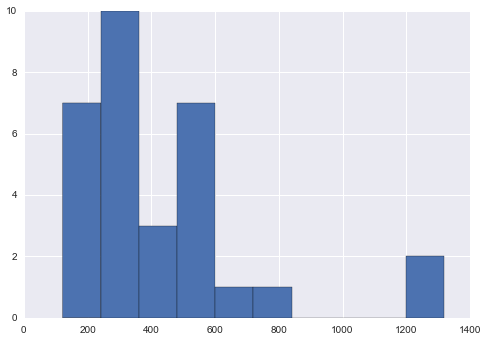

In [8]:
startdf.start_tpa.hist()

In [9]:
conds = df.cond.unique()
conds.sort()
conds

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

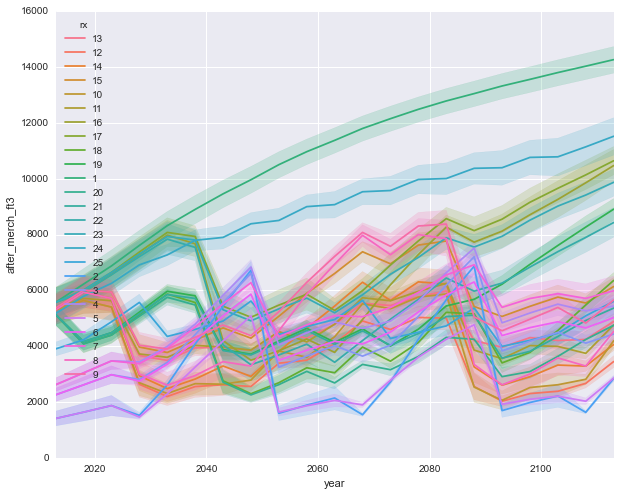

In [12]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.tsplot(df.loc[(df.offset == 0)],
           "year", unit="cond", condition="rx", value="after_merch_ft3")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127f92d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1130448d0>]], dtype=object)

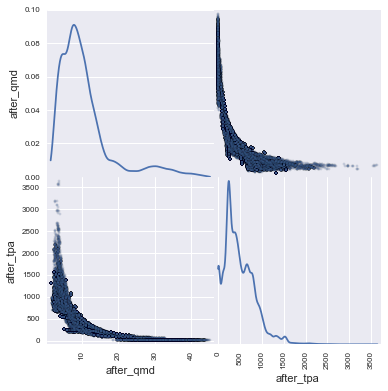

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['after_qmd', 'after_tpa']],
               alpha=0.2, figsize=(6, 6), diagonal='kde')